In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
#import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
#Components used for signal - ACF,PSD
import scipy.signal

In [78]:
directory_in_str = "E:\\Haritha\\MasterThesis\\ModelTraining\\aa_measurements\\FFTfilegenerationpurpose\\windowedacf_test(adc-window-acf)"
Emptyfilelist = []
empty = pd.DataFrame()
print("Adding the following files : ")
for file in os.listdir(directory_in_str) :
    if file.startswith("WindowedsignalACF-Part5.csv") :
        print(file)
        filepathempty = directory_in_str +"\\" + file
        df1 = pd.read_csv(filepathempty, engine = 'python')
        empty  = empty.append(df1)
    else :
        continue  
empty.reset_index(drop=True, inplace=True)
empty

Adding the following files : 
WindowedsignalACF-Part5.csv


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_4652\573278677.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,Label
0,1.0,0.990811,0.963888,0.919858,0.859518,0.783975,0.694600,0.592962,0.480864,0.360328,...,3.246525e-07,2.403120e-07,1.723952e-07,1.252329e-07,7.738447e-08,4.325096e-08,7.144937e-10,1.101307e-10,3.736696e-10,0
1,1.0,0.990870,0.964032,0.920079,0.859788,0.784277,0.694906,0.593236,0.481086,0.360481,...,4.736889e-07,4.515524e-07,4.051743e-07,3.276418e-07,2.155704e-07,8.197419e-08,4.734160e-09,3.215687e-09,1.316695e-09,0
2,1.0,0.990882,0.964117,0.920289,0.860167,0.784872,0.695758,0.594394,0.482587,0.362349,...,4.585825e-08,1.058985e-07,9.311299e-08,6.368234e-08,4.625015e-09,-3.104326e-08,-1.456496e-08,-2.878562e-11,-4.630547e-11,0
3,1.0,0.990843,0.963979,0.920015,0.859727,0.784219,0.694850,0.593202,0.481084,0.360512,...,7.394445e-08,1.047290e-07,1.365690e-07,1.424308e-07,1.180756e-07,6.007120e-08,1.415072e-09,1.742213e-09,1.187261e-09,0
4,1.0,0.990778,0.963851,0.919834,0.859500,0.783955,0.694564,0.592905,0.480794,0.360241,...,4.929423e-10,3.690402e-08,3.231941e-08,1.532334e-08,-2.823577e-09,3.012131e-09,-1.189987e-10,1.650960e-11,-1.757717e-11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1.0,0.990983,0.965037,0.922723,0.864739,0.792060,0.705914,0.607628,0.498994,0.381842,...,-2.361125e-06,-1.652284e-06,-1.066264e-06,-6.071926e-07,-2.194586e-07,2.519658e-08,2.631476e-08,1.784309e-08,1.012237e-08,1
1496,1.0,0.990991,0.965085,0.922810,0.864867,0.792239,0.706138,0.607901,0.499331,0.382227,...,8.946397e-07,6.348007e-07,3.942054e-07,2.151169e-07,6.990906e-08,-1.296823e-08,-1.227196e-08,-1.220152e-08,-7.827257e-09,1
1497,1.0,0.991091,0.965466,0.923670,0.866394,0.794623,0.709539,0.612467,0.505181,0.389495,...,-6.251028e-07,-4.144863e-07,-2.516090e-07,-1.459357e-07,-8.397065e-08,-3.145365e-08,-1.792280e-08,-8.924264e-09,-4.573121e-09,1
1498,1.0,0.990842,0.964880,0.922553,0.864570,0.791901,0.705773,0.607498,0.498880,0.381764,...,-4.774750e-06,-3.824891e-06,-2.847325e-06,-1.966095e-06,-1.161857e-06,-4.977745e-07,2.276335e-08,2.950579e-08,2.284083e-08,1


In [5]:
positiveacf2 = pd.DataFrame()
positiveacf2 = empty**2

In [79]:
positiveacf = pd.DataFrame()
positiveacf = positiveacf.append(empty)

C:\Users\Vinoth\AppData\Local\Temp\ipykernel_4652\669718481.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  positiveacf = positiveacf.append(empty)


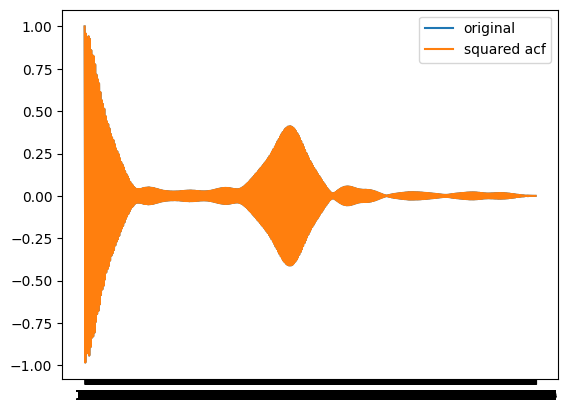

In [22]:
plt.plot(empty.iloc[0,0:16384], label='original')
plt.plot(positiveacf.iloc[0,0:16384], label='squared acf')
plt.legend()
plt.show()

In [80]:
#Reversing the dataframe to get the negative ACF portion
negativeacf = positiveacf[positiveacf.columns[::-1]]

#Deleting the last column (corresponding to lag =0) as it is already present in the positive portion of the ACF
negativeacf = negativeacf.iloc[: , :-1]

In [81]:
wholeacfsignal = pd.concat([negativeacf, positiveacf], axis=1)
wholeacfsignal.columns = range(wholeacfsignal.columns.size)
wholeacfsignal.reset_index(drop=True, inplace=True)
wholeacfsignal

,0,1,2,3,4,5,6,7,8,9,...,32759,32760,32761,32762,32763,32764,32765,32766,32767,32768
0,0,3.736696e-10,1.101307e-10,7.144937e-10,4.325096e-08,7.738447e-08,1.252329e-07,1.723952e-07,2.403120e-07,3.246525e-07,...,3.246525e-07,2.403120e-07,1.723952e-07,1.252329e-07,7.738447e-08,4.325096e-08,7.144937e-10,1.101307e-10,3.736696e-10,0
1,0,1.316695e-09,3.215687e-09,4.734160e-09,8.197419e-08,2.155704e-07,3.276418e-07,4.051743e-07,4.515524e-07,4.736889e-07,...,4.736889e-07,4.515524e-07,4.051743e-07,3.276418e-07,2.155704e-07,8.197419e-08,4.734160e-09,3.215687e-09,1.316695e-09,0
2,0,-4.630547e-11,-2.878562e-11,-1.456496e-08,-3.104326e-08,4.625015e-09,6.368234e-08,9.311299e-08,1.058985e-07,4.585825e-08,...,4.585825e-08,1.058985e-07,9.311299e-08,6.368234e-08,4.625015e-09,-3.104326e-08,-1.456496e-08,-2.878562e-11,-4.630547e-11,0
3,0,1.187261e-09,1.742213e-09,1.415072e-09,6.007120e-08,1.180756e-07,1.424308e-07,1.365690e-07,1.047290e-07,7.394445e-08,...,7.394445e-08,1.047290e-07,1.365690e-07,1.424308e-07,1.180756e-07,6.007120e-08,1.415072e-09,1.742213e-09,1.187261e-09,0
4,0,-1.757717e-11,1.650960e-11,-1.189987e-10,3.012131e-09,-2.823577e-09,1.532334e-08,3.231941e-08,3.690402e-08,4.929423e-10,...,4.929423e-10,3.690402e-08,3.231941e-08,1.532334e-08,-2.823577e-09,3.012131e-09,-1.189987e-10,1.650960e-11,-1.757717e-11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1,1.012237e-08,1.784309e-08,2.631476e-08,2.519658e-08,-2.194586e-07,-6.071926e-07,-1.066264e-06,-1.652284e-06,-2.361125e-06,...,-2.361125e-06,-1.652284e-06,-1.066264e-06,-6.071926e-07,-2.194586e-07,2.519658e-08,2.631476e-08,1.784309e-08,1.012237e-08,1
1496,1,-7.827257e-09,-1.220152e-08,-1.227196e-08,-1.296823e-08,6.990906e-08,2.151169e-07,3.942054e-07,6.348007e-07,8.946397e-07,...,8.946397e-07,6.348007e-07,3.942054e-07,2.151169e-07,6.990906e-08,-1.296823e-08,-1.227196e-08,-1.220152e-08,-7.827257e-09,1
1497,1,-4.573121e-09,-8.924264e-09,-1.792280e-08,-3.145365e-08,-8.397065e-08,-1.459357e-07,-2.516090e-07,-4.144863e-07,-6.251028e-07,...,-6.251028e-07,-4.144863e-07,-2.516090e-07,-1.459357e-07,-8.397065e-08,-3.145365e-08,-1.792280e-08,-8.924264e-09,-4.573121e-09,1
1498,1,2.284083e-08,2.950579e-08,2.276335e-08,-4.977745e-07,-1.161857e-06,-1.966095e-06,-2.847325e-06,-3.824891e-06,-4.774750e-06,...,-4.774750e-06,-3.824891e-06,-2.847325e-06,-1.966095e-06,-1.161857e-06,-4.977745e-07,2.276335e-08,2.950579e-08,2.284083e-08,1


In [82]:
wholeacfsignal.iloc[:,1:32768].shape

(1500, 32767)

In [50]:
hammwindow = np.hamming(32767)
hammwindow

array([0.08      , 0.08000001, 0.08000003, ..., 0.08000003, 0.08000001,
       0.08      ])

In [83]:
from numpy.fft import fft, ifft

X_fft = np.fft.fft(wholeacfsignal.iloc[:,1:32768])
N = 32768
X_fftmagpsd = np.abs(X_fft)/N

X_fftpsd = pd.DataFrame(X_fftmagpsd)

In [84]:
X_fftpsdtemp = pd.DataFrame()
X_fftpsdtemp = X_fftpsdtemp.append(X_fftpsd.iloc[:,600:1000])

C:\Users\Vinoth\AppData\Local\Temp\ipykernel_4652\3847118609.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_fftpsdtemp = X_fftpsdtemp.append(X_fftpsd.iloc[:,600:1000])


In [85]:
X_fftpsdtemp.shape

(1500, 400)

In [86]:

X_fftpsdtemp["Label"] = positiveacf["Label"]

In [87]:
X_fftpsdtemp["Label"]

0       0
1       0
2       0
3       0
4       0
       ..
1495    1
1496    1
1497    1
1498    1
1499    1
Name: Label, Length: 1500, dtype: int64

In [88]:
X_fftpsdtemp

,600,601,602,603,604,605,606,607,608,609,...,991,992,993,994,995,996,997,998,999,Label
0,4.433126e-05,5.513731e-05,5.113868e-05,4.348906e-05,5.354069e-05,6.936134e-05,6.649259e-05,5.727727e-05,6.535150e-05,7.604370e-05,...,4.393633e-06,6.576739e-06,5.173691e-06,3.142985e-06,4.711014e-06,6.767579e-06,5.222624e-06,3.270224e-06,4.688666e-06,0
1,2.739615e-05,3.323322e-05,3.820226e-05,3.575246e-05,4.008187e-05,5.973029e-05,7.299907e-05,6.796751e-05,6.885683e-05,7.818151e-05,...,6.566839e-06,4.010406e-06,4.696626e-06,7.162570e-06,6.029769e-06,3.265694e-06,3.252454e-06,5.378603e-06,5.288811e-06,0
2,3.943434e-05,4.828925e-05,5.133328e-05,4.311995e-05,4.411861e-05,5.845807e-05,6.347388e-05,5.465934e-05,5.464639e-05,6.524900e-05,...,6.165659e-06,3.630023e-06,4.026197e-06,6.300212e-06,5.403122e-06,2.780894e-06,3.185251e-06,4.850788e-06,3.850046e-06,0
3,5.027169e-05,6.355240e-05,5.906885e-05,4.981342e-05,5.742528e-05,6.654875e-05,5.985090e-05,5.186410e-05,6.015207e-05,7.066294e-05,...,5.230214e-06,6.917987e-06,5.098003e-06,2.805083e-06,4.249070e-06,5.854159e-06,4.331952e-06,2.780179e-06,4.481816e-06,0
4,5.874891e-05,7.547343e-05,9.026445e-05,8.608681e-05,9.052280e-05,1.147480e-04,1.221252e-04,1.061576e-04,1.049523e-04,1.177296e-04,...,4.044322e-06,2.917943e-06,2.917416e-06,6.403610e-06,7.983005e-06,5.683677e-06,5.677123e-06,9.357252e-06,9.762834e-06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,4.409060e-07,4.166796e-07,5.719864e-08,6.551350e-08,4.806139e-08,3.533773e-08,4.280386e-07,2.597415e-07,5.113165e-07,1.246713e-06,...,4.399942e-07,5.635339e-07,7.398988e-07,6.423587e-07,5.056246e-07,5.575722e-07,1.457306e-07,3.756292e-07,8.429637e-07,1
1496,1.476079e-09,3.604036e-07,6.747540e-07,2.565798e-07,3.298861e-08,1.156735e-07,7.717236e-08,2.746193e-07,1.064248e-07,6.532278e-08,...,8.594603e-07,5.918050e-07,1.125031e-07,1.895255e-07,1.077197e-06,1.488079e-06,6.165694e-07,4.586723e-08,5.310229e-07,1
1497,7.262983e-07,2.208817e-07,5.217353e-08,1.508537e-08,2.449553e-07,6.430200e-07,6.546120e-07,1.604384e-07,7.789656e-07,1.148734e-06,...,3.073059e-07,4.777194e-07,7.445020e-07,2.944293e-07,1.192524e-07,5.491694e-07,2.265870e-07,8.432986e-08,3.094647e-07,1
1498,7.797352e-08,1.422256e-07,4.331860e-07,2.268698e-07,3.266781e-07,4.324802e-07,2.411459e-07,2.812629e-08,2.772972e-08,3.775592e-08,...,4.527981e-07,5.971102e-07,1.489644e-07,5.863287e-07,4.980424e-07,5.481577e-08,5.965131e-07,6.075757e-07,4.428717e-07,1


In [89]:
X_fftpsdtemp.to_csv('PSDfromWindowedADC-Part5.csv', encoding='utf-8',index=False)

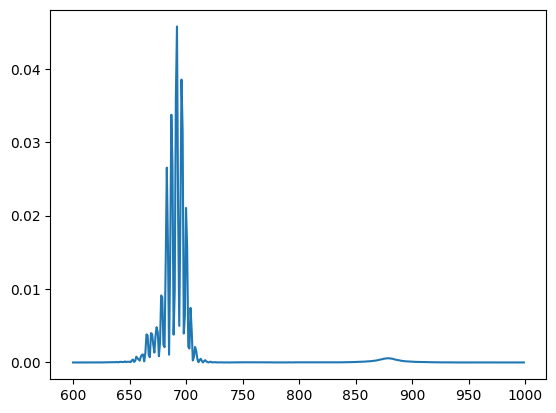

In [19]:
plt.plot(X_fftpsd.iloc[0,600:1000])
plt.plot(X_fftpsd.iloc[0,600:1000])

In [59]:
windowedsignal = wholeacfsignal.iloc[:,1:32768] * hammwindow

In [60]:
windowedsignal.shape

(1500, 32767)

In [61]:
from numpy.fft import fft, ifft

X_fft2 = np.fft.fft(windowedsignal.iloc[:,1:32768])
N = 32768
X_fftmagpsd2 = np.abs(X_fft2)/N

X_fftpsd2 = pd.DataFrame(X_fftmagpsd2)

In [62]:
X_fftpsdtemp2 = pd.DataFrame()
X_fftpsdtemp2 = X_fftpsdtemp2.append(X_fftpsd2.iloc[:,600:1000])

C:\Users\Vinoth\AppData\Local\Temp\ipykernel_8800\964816421.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_fftpsdtemp2 = X_fftpsdtemp2.append(X_fftpsd2.iloc[:,600:1000])


In [63]:
X_fftpsdtemp2["Label"] = positiveacf["Label"]

In [64]:
X_fftpsdtemp2.shape

(1500, 401)

In [65]:
X_fftpsdtemp2

,600,601,602,603,604,605,606,607,608,609,...,991,992,993,994,995,996,997,998,999,Label
0,0.000057,0.000102,0.000075,3.277020e-05,6.738737e-05,0.000121,0.000089,3.870058e-05,7.714054e-05,1.307127e-04,...,0.000021,0.000030,0.000023,0.000013,0.000020,0.000029,0.000021,0.000012,0.000019,0
1,0.000026,0.000062,0.000076,4.180078e-05,3.532396e-05,0.000091,0.000111,6.080503e-05,6.090366e-05,1.189764e-04,...,0.000028,0.000016,0.000019,0.000031,0.000026,0.000014,0.000014,0.000024,0.000022,0
2,0.000031,0.000073,0.000084,4.100432e-05,3.812587e-05,0.000090,0.000096,4.581812e-05,4.596638e-05,9.891968e-05,...,0.000028,0.000016,0.000018,0.000029,0.000026,0.000015,0.000018,0.000027,0.000022,0
3,0.000058,0.000106,0.000079,3.759623e-05,7.348319e-05,0.000112,0.000076,3.593647e-05,7.530040e-05,1.196000e-04,...,0.000022,0.000031,0.000024,0.000015,0.000022,0.000029,0.000020,0.000012,0.000020,0
4,0.000040,0.000092,0.000126,7.427809e-05,6.560143e-05,0.000145,0.000154,7.607043e-05,8.012637e-05,1.566584e-04,...,0.000026,0.000018,0.000015,0.000028,0.000030,0.000016,0.000015,0.000029,0.000028,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.000001,0.000001,0.000001,1.159401e-06,1.166428e-06,0.000001,0.000002,1.473362e-06,1.631908e-06,2.048593e-06,...,0.000011,0.000011,0.000011,0.000011,0.000010,0.000009,0.000008,0.000008,0.000008,1
1496,0.000001,0.000002,0.000002,1.347810e-06,1.193870e-06,0.000001,0.000001,1.228924e-06,9.548191e-07,8.348518e-07,...,0.000008,0.000008,0.000007,0.000007,0.000008,0.000008,0.000006,0.000005,0.000006,1
1497,0.000002,0.000001,0.000001,1.148845e-06,1.463162e-06,0.000002,0.000002,1.832217e-06,2.493108e-06,2.871683e-06,...,0.000008,0.000008,0.000007,0.000006,0.000006,0.000006,0.000005,0.000005,0.000005,1
1498,0.000001,0.000001,0.000001,7.685275e-07,8.973908e-07,0.000001,0.000001,8.947964e-07,8.621018e-07,8.010507e-07,...,0.000009,0.000009,0.000008,0.000008,0.000007,0.000007,0.000007,0.000007,0.000006,1


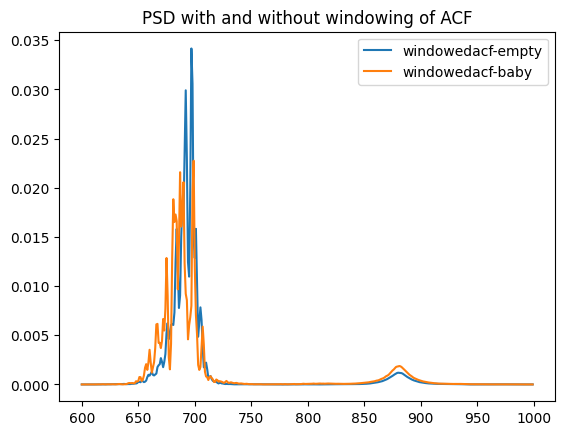

In [16]:
#plt.plot(X_fftpsd_withoutwindowofacf.iloc[0,600:1000], label = 'plainacf-empty')
#plt.plot(X_fftpsd_withoutwindowofacf.iloc[2098,600:1000], label = 'plainacf-baby' )
plt.plot(X_fftpsd.iloc[0,600:1000],label = 'windowedacf-empty')
plt.plot(X_fftpsd.iloc[2098,600:1000],label = 'windowedacf-baby')
plt.title("PSD with and without windowing of ACF")
plt.legend()
plt.show()

In [66]:
X_fftpsdtemp2.to_csv('WindowedPSD-Part5.csv', encoding='utf-8',index=False)

# Generating Feature Importance

In [95]:
positiveacf

,600,601,602,603,604,605,606,607,608,609,...,991,992,993,994,995,996,997,998,999,Label
0,3.024759e-07,3.453213e-07,4.516516e-07,3.525591e-07,4.475218e-07,4.822920e-07,5.180486e-07,9.011292e-07,0.000001,0.000001,...,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000004,0.000004,0.000004,0
1,8.395725e-07,9.887520e-07,9.368137e-07,1.348996e-06,1.343495e-06,1.200532e-06,1.408497e-06,1.464367e-06,0.000002,0.000002,...,0.000003,0.000004,0.000004,0.000004,0.000004,0.000004,0.000003,0.000004,0.000004,0
2,1.891354e-06,2.536069e-06,1.358203e-06,9.048994e-07,1.994346e-06,2.360339e-06,1.342208e-06,1.691815e-06,0.000003,0.000002,...,0.000003,0.000003,0.000003,0.000003,0.000003,0.000004,0.000004,0.000003,0.000003,0
3,1.188600e-06,7.858382e-07,1.804617e-06,2.639991e-06,1.755323e-06,1.311572e-06,2.520165e-06,2.858946e-06,0.000002,0.000001,...,0.000003,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000003,0.000004,0
4,1.139918e-06,1.122375e-06,8.596644e-07,8.723769e-07,7.107593e-07,9.061113e-07,9.147982e-07,1.096754e-06,0.000001,0.000002,...,0.000003,0.000004,0.000004,0.000004,0.000003,0.000003,0.000003,0.000003,0.000003,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15675,5.804694e-06,6.824540e-06,7.722746e-06,8.507466e-06,1.038136e-05,1.141981e-05,1.094181e-05,1.261606e-05,0.000016,0.000017,...,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000014,0.000014,0.000014,1
15676,7.769570e-06,9.200328e-06,7.850761e-06,1.208318e-05,1.361042e-05,1.454049e-05,1.935953e-05,1.486264e-05,0.000020,0.000020,...,0.000021,0.000019,0.000020,0.000019,0.000022,0.000021,0.000019,0.000020,0.000019,1
15677,9.540011e-05,1.014277e-04,9.356738e-05,1.044042e-04,9.871389e-05,9.453461e-05,1.005828e-04,9.039064e-05,0.000097,0.000099,...,0.000004,0.000004,0.000003,0.000003,0.000003,0.000004,0.000005,0.000006,0.000008,1
15678,3.237102e-06,4.152214e-06,5.178721e-06,5.868051e-06,7.895288e-06,8.614634e-06,9.146110e-06,9.523078e-06,0.000012,0.000013,...,0.000010,0.000009,0.000008,0.000008,0.000007,0.000008,0.000007,0.000007,0.000007,1


In [96]:
train, test = train_test_split(positiveacf, test_size=0.2, random_state=42, shuffle=True)

In [97]:
X_train = train.iloc[:,0:400] 
#X_train = X_train/1000 - already divided by max
y_train = train['Label']

X_test = test.iloc[:,0:400] 
#X_test = X_test/1000 - already divided by max
y_test = test['Label']

In [33]:
X_train = X_train * 32768

In [35]:
X_test = X_test * 32768

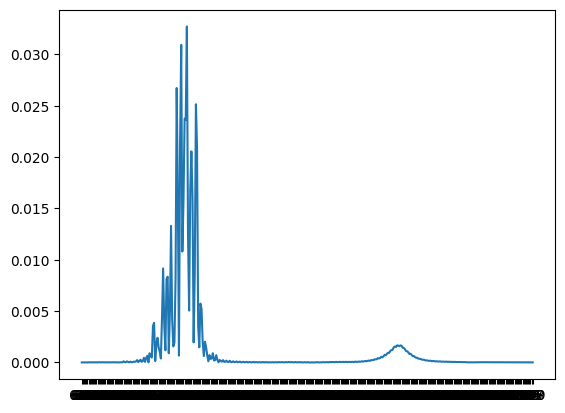

In [64]:
plt.plot(X_test.iloc[0,:])

In [98]:
#Testing out feature importances with ExtraTrees Regressor Model

regmod = ExtraTreesRegressor()
regmod.fit(X_train,y_train)

#print(regmod.feature_importances_)

ExtraTreesRegressor()

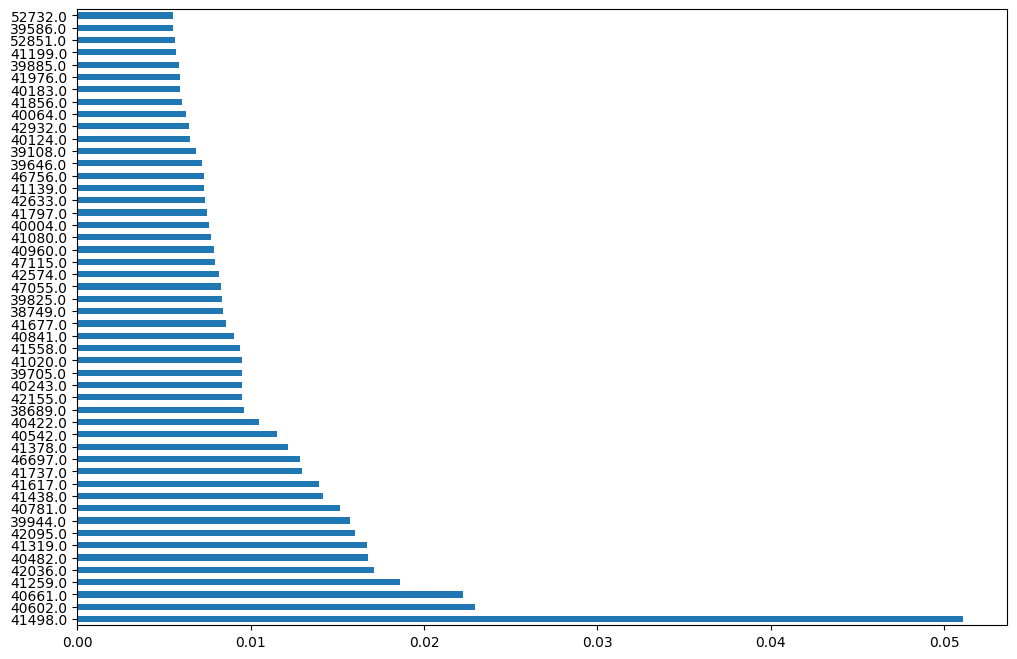

In [113]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(regmod.feature_importances_, index=faxisint)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

### Computing an average empty signal and comparing it with a average baby signal

In [114]:
avgbaby = positiveacf[positiveacf['Label']==1].mean(axis=0)

In [115]:
avgempty = positiveacf[positiveacf['Label']==0].mean(axis=0)

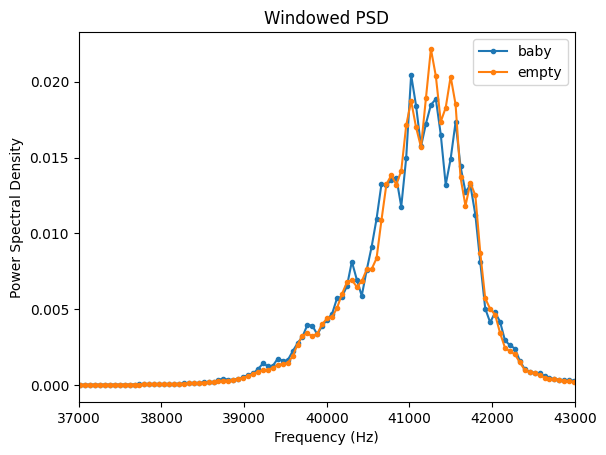

In [121]:
plt.plot(faxis,avgbaby[0:400], '.-', label = 'baby')
plt.plot(faxis,avgempty[0:400], '.-', label = 'empty')
plt.legend()
plt.title("Windowed PSD")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.xlim([37000,43000])
plt.show()

### Finding Peaks

In [122]:
from scipy.signal import find_peaks

In [123]:
#Creating a frequency axis
interval_size = 1953125/32768
faxis = np.linspace(int(600*interval_size), int(1000*interval_size), 400)
faxis.shape

(400,)

In [124]:
faxisint = np.empty(400)
for i in range(0,399) :
    faxisint[i] = int(faxis[i])

faxisint.shape
    

(400,)

In [126]:
temp = find_peaks(avgempty.head(n=400), height=0.0005)
temp2 = find_peaks(avgbaby.head(n=400), height=0.0005)

In [127]:
yaxis = temp[1]['peak_heights']
yaxis2 = temp2[1]['peak_heights']

In [128]:
peak_pos = faxis[temp[0]]
peak_pos2 = faxis[temp2[0]]

Text(0, 0.5, 'Power Spectral Density')

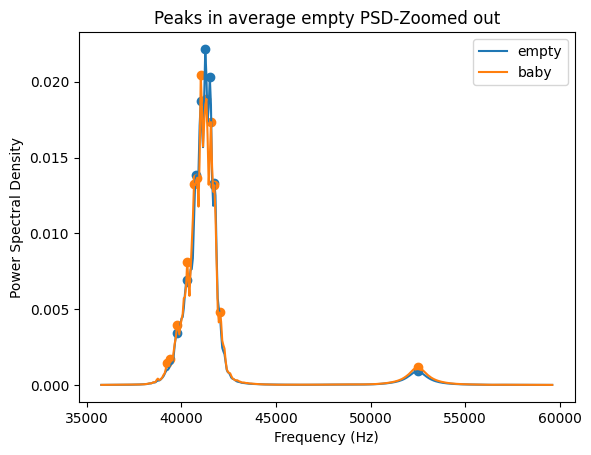

In [134]:
plt.plot(faxis,avgempty[0:400], label = 'empty')
plt.plot(faxis,avgbaby[0:400], label = 'baby')
plt.scatter(peak_pos,yaxis)
plt.scatter(peak_pos2,yaxis2)
#plt.xlim([37500,45000])
plt.title("Peaks in average empty PSD-Zoomed out")
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")

In [99]:
type(X_train.columns)

pandas.core.indexes.base.Index